<a href="https://colab.research.google.com/github/M-Srivatsav999/Forst-Fire-Detection-Using-DL/blob/main/Forst_Fire_Detection_Using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:",path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [21]:
#Importing necessary Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing. image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout,Input

In [11]:
#To ensure the GPU is present
import tensorflow as tf # Import tensorflow here

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print('GPU is Used!')
else:
  print('GPU is unavailable')

GPU is Used!


In [28]:
#Load and explore the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

# Import the os module
import os #Importing the os module here to make it accessible in this code block

# List all the classes
classes = os.listdir(train_dir)
#Load and explore the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)
#Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


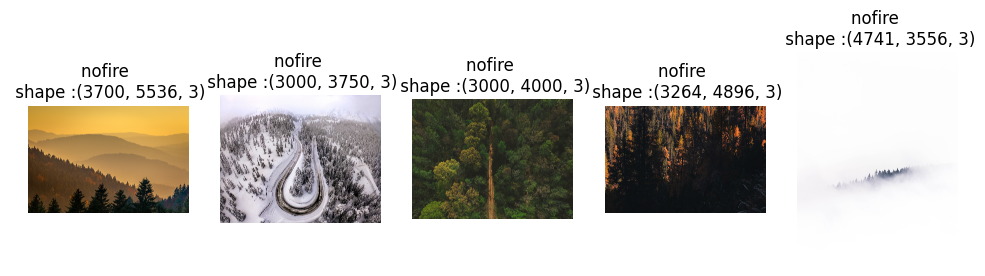

In [29]:
#Let's visualize the images in the dataset
import matplotlib.pyplot as plt # Importing matplotlib.pyplot here

plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path= os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape :{img.shape}')
  plt.axis('off')
plt.show()

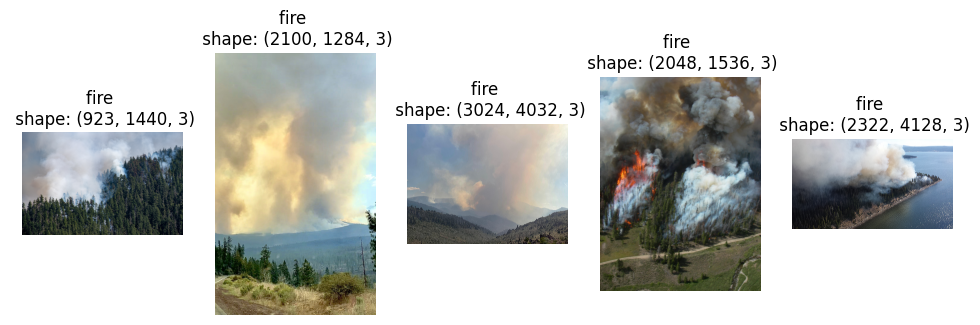

In [30]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()


In [31]:
# Preprocessing
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32 # there will be 32 images in a batch!

# Data generators
train_datagen = ImageDataGenerator (rescale=1./255)
val_datagen = ImageDataGenerator (rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the directories (Make sure these paths are correct)
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [37]:
#map the indices
class_mapping = train_generator.class_indices # Added the assignment operator '='
#print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['fire', 'nofire']


In [38]:
#Let's build the CNN Model
model = Sequential([
     Input (shape=(img_width, img_height, 3)),
     Conv2D(32, (3,3), activation='relu'),
     MaxPooling2D (pool_size=(2,2)),

     Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D (pool_size=(2,2)),

     Conv2D(128, (3,3), activation='relu'),
     MaxPooling2D (pool_size=(2,2)),

     Flatten(),
     Dense (512, activation='relu'),
     Dropout(0.5),
     Dense (1, activation='sigmoid')
])